# Best so far

For each image in the ```Image_data/Examples/``` folder there is a txt file which is supposed to keep track of the best algorithm found for that particular image.  Each time we run see-segment it could find a better algorithm so this is our way of keeping up with the best.  

This jupyter notebook reads though the files and displays the results of the best so far for each fo the examples. 


#TODO This workflow is not complete. We are not yet checking in the bestsofar txt files in the directory so running this on a clean build will just show the input image and ground truth.

In [1]:
def read_pop(filename):
    """Read Text output"""
    print(f"Reading in {filename}")
    inlist = []
    fitness = []
    with open(filename,'r') as myfile:
        for line in myfile:
            if (len(line) > 1):
                x,fit,pop = eval(line)
                inlist.append(pop)
                fitness.append(fit)
    return inlist, fitness

In [2]:
from pathlib import Path
def getimages(folder='Image_data/Examples/'):
    #def pickimage(

    directory = Path(folder)

    allfiles = sorted(directory.glob('*'))

    filelist = []
    masklist = []
    progresslist = []
    for file in allfiles:
        if file.suffix ==".jpg" or file.suffix ==".jpeg" or file.suffix ==".JPEG" or file.suffix ==".png":
            if not "_GT" in file.name:
                filelist.append(file)
                mask = directory.glob(f"{file.stem}_GT*")
                for m in mask:
                    masklist.append(m)
                progresslist.append(Path(f"{folder}/_{file.stem}.txt"))
    return filelist, masklist, progresslist

In [3]:
directory = "./Image_data/Examples/"
[images, masks, progresslist] = getimages(directory)

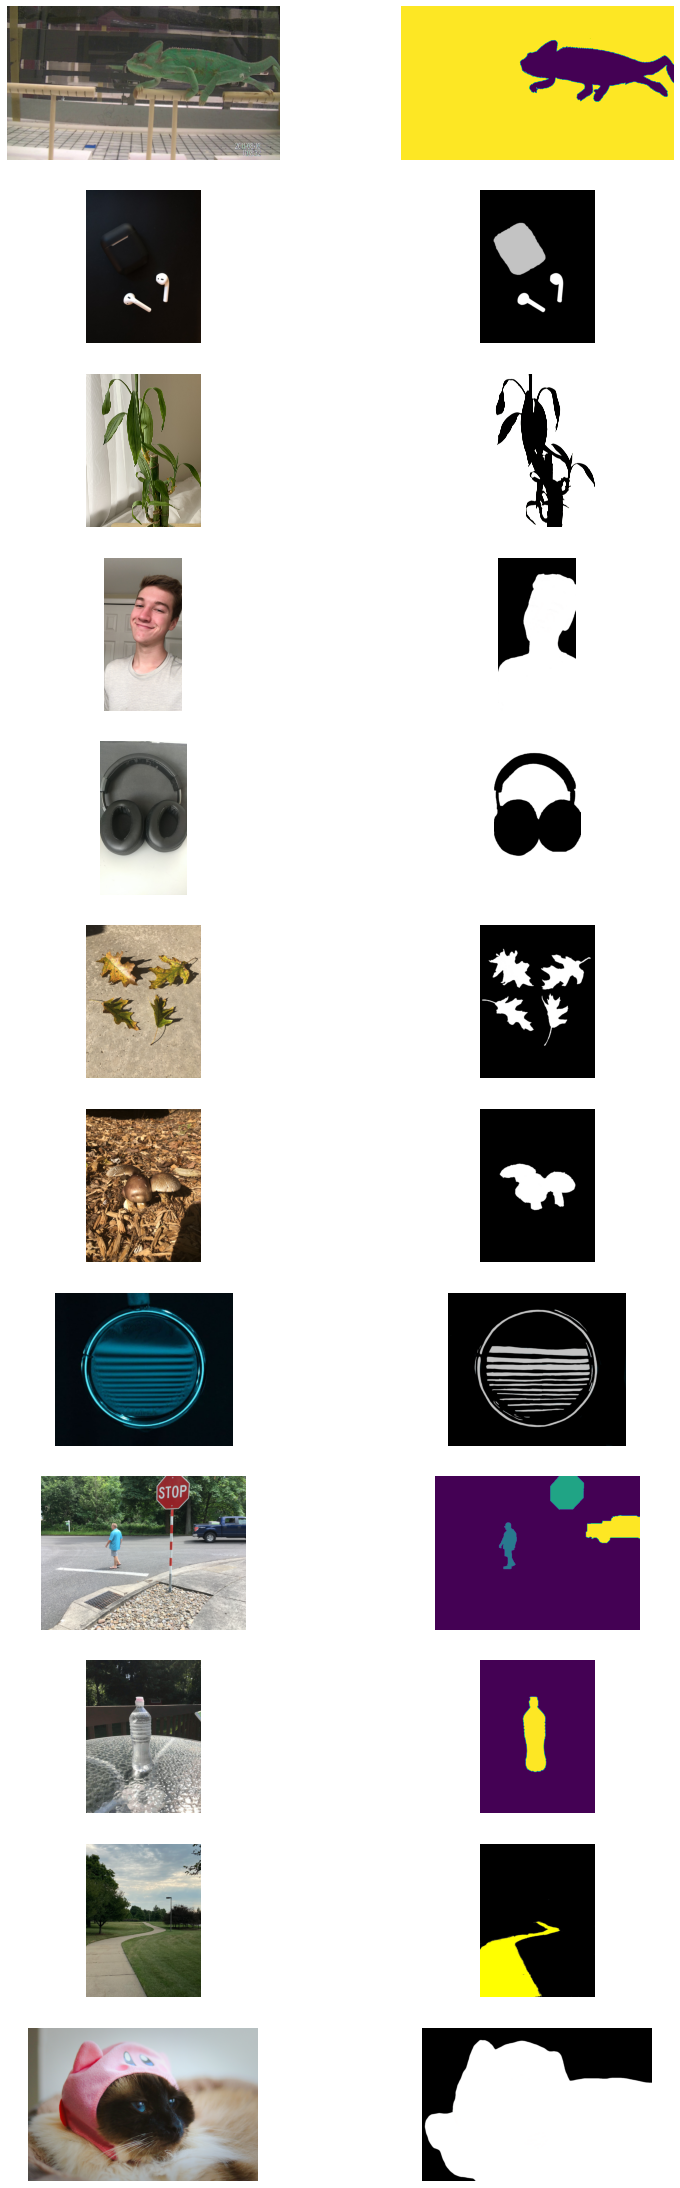

In [4]:
import numpy as np
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes 
from see.git_version import git_version
from see import GeneticSearch, Segmentors
import matplotlib.pylab as plt
import imageio

fig = plt.figure(figsize=(20, 40))

rows = len(images)

row = 0
for imfile, gtfile, bestfile in zip(images, masks, progresslist):
    mydata = base_classes.pipedata()
    mydata.img = imageio.imread(imfile)
    mydata.gmask = imageio.imread(gtfile) 
    
    my_ax = fig.add_subplot(rows, 3, 1+row*3)
    my_ax.imshow(mydata.img)
    my_ax.axis('off')
    
    my_ax = fig.add_subplot(rows, 3, 2+row*3)
    my_ax.imshow(mydata.gmask)
    my_ax.axis('off')
    
    if bestfile.exists():
        [inlist, fitness] = read_pop(bestfile)
        best = inlist[np.argmin(fitness)]

        workflow.addalgos([colorspace, segmentor, segment_fitness])
        wf = workflow(paramlist=best)

        mydata = wf.pipe(mydata)

        my_ax = fig.add_subplot(rows, 3, 3+row*3)
        my_ax.imshow(mydata.mask)
        my_ax.set_title(np.min(fitness))
        my_ax.axis('off')
    row = row+1